In [86]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from tqdm import tqdm

In [87]:
QBER = np.load('data/QBER.npy')

QBER_downsampled_large = QBER[::10]

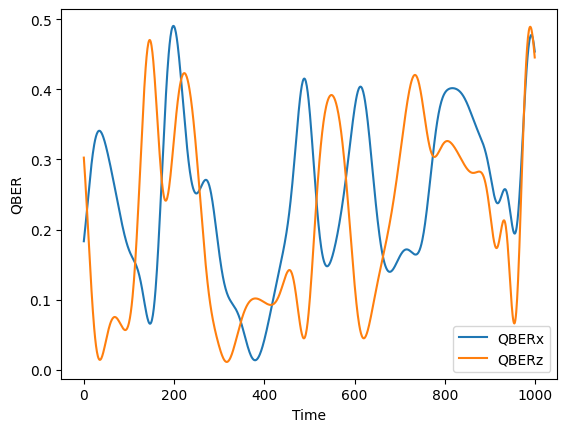

In [88]:
import matplotlib.pyplot as plt

plt.plot(QBER_downsampled_large[:1000, 0], label='QBERx')
plt.plot(QBER_downsampled_large[:1000, 1], label='QBERz')
plt.xlabel('Time')
plt.ylabel('QBER')
plt.legend()
plt.show()

# From QBER to gamma, phi

In [89]:
gamma = np.arccos(1 - 2 * QBER_downsampled_large[:, 0]) # QBERz
sin_phi = 1/np.sin(gamma) # QBERy
cos_phi = (1 - 2 * QBER_downsampled_large[:, 1]) / np.sin(gamma) # QBERx
phi = np.arctan(sin_phi / cos_phi)
print(len(gamma), len(phi))

100000 100000


# From gamma, phi to stokes

In [90]:
ellipticity = phi
azimuth = gamma

s1 = np.cos(ellipticity)*np.cos(azimuth)
s2 = np.cos(ellipticity)*np.sin(ellipticity)
s3 = np.sin(azimuth)

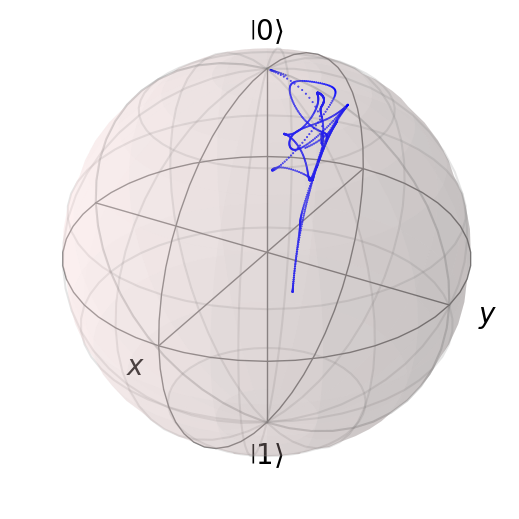

In [94]:
# fig = plt.figure()
# ax = Axes3D(fig,azim=-40,elev=30)
sphere = qt.Bloch()
n = 1000

sphere.point_size = [0.2] 
sphere.add_points([s1[:n], s2[:n], s3[:n]])
# sphere.add_vectors([s1[n], s2[n], s3[n]])
sphere.view = [-60,30]
sphere.show()

# sx = s1_norm
# sy = s2_norm
# sz = s3_norm

In [95]:
b = qt.Bloch()
b.vector_color = ['r']
b.view = [-40,30]
for i in tqdm(range(n)):
    b.clear()
    if i < n:
        b.add_vectors([s1[i+1],s2[i+1],s3[i+1]])
        b.add_points([s1[:i+1],s2[:i+1],s3[:i+1]])
        b.save(dirc='temp') #saving images to temp directory in current working directory

100%|██████████| 1000/1000 [01:42<00:00,  9.72it/s]


In [98]:
import matplotlib.pyplot as plt
import os

# Create the temp/ directory if it doesn't exist
os.makedirs("temp", exist_ok=True)

# Plot and save each new plot
for i in tqdm(range(len(QBER_downsampled_large[:n]))):
    plt.plot(QBER_downsampled_large[:i, 0], label='QBERz')
    plt.plot(QBER_downsampled_large[:i, 1], label='QBERx')
    plt.title(f"QBER at time {i}")
    plt.xlabel('Sample')
    plt.ylabel('QBER')
    plt.savefig(f"temp/plot_{i}.png")
    plt.close()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:19<00:00, 12.66it/s]
